In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.3MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Kolkata Knight Riders','Chennai Super Kings'])] 
data_f = data_f.loc[data_f.team2.isin(['Kolkata Knight Riders','Chennai Super Kings'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
165,166,2009,Centurion,2009-05-18,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge,SuperSport Park,SJA Taufel,RB Tiffin,NaN
181,182,2010,Kolkata,2010-03-16,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
221,222,2010,Chennai,2010-04-13,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,R Ashwin,"MA Chidambaram Stadium, Chepauk",SS Hazare,SJA Taufel,NaN
234,235,2011,Chennai,2011-04-08,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,2,0,S Anirudha,"MA Chidambaram Stadium, Chepauk",BR Doctrove,PR Reiffel,NaN
280,281,2011,Kolkata,2011-05-07,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,NaN
346,347,2012,Chennai,2012-04-30,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,G Gambhir,"MA Chidambaram Stadium, Chepauk",BF Bowden,C Shamshuddin,NaN
367,368,2012,Kolkata,2012-05-14,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,MEK Hussey,Eden Gardens,JD Cloete,SJA Taufel,NaN
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN


**Let's do Q1 now**

CSK Wins - 13
KKR Wins - 7


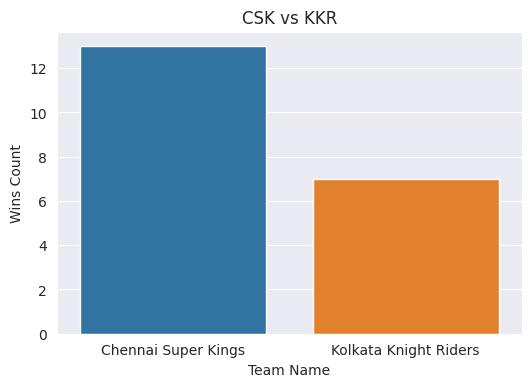

In [12]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('CSK vs KKR')
A,B =data_f.winner.value_counts()

print('CSK Wins -',A)
print('KKR Wins -',B)

plt.show()


Let's mark CSK as they clearly have advantage

**Let's do Q2 now**

**Let's do analysis around 75 runs of both teams**

In [23]:
data_n = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_n = data_n.loc[data.batting_team.isin(['Kolkata Knight Riders'])]

In [24]:
data_l = data_n.loc[data_n.match_id.isin(['7898','7926','11314','11320'])]

Let's take only last 4 matches as if we include all matches average turns to be too close.

In [34]:
data_l = data_l.loc[data_l.over<=9]

In [35]:
data_l.total_runs.sum()

300

In [37]:
300/4

75.0

So, In last 4 matches KKR took 54 balls to take 75 runs

In [38]:
data_n2 = data.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_n2 = data_n2.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]

In [62]:
data_l2 = data_n2.loc[data_n2.match_id.isin(['7898','7926','11314','11320'])]

In [65]:
data_l2 = data_l2.loc[data_l2.over<=9]

In [66]:
data_l2.total_runs.sum()

281

In [63]:
data_l2 = data_l2.loc[data_l2.over<=10]

In [64]:
data_l2.total_runs.sum()

311

In [67]:
281/4

70.25

In [68]:
311/4

77.75

To Score 75 runs in 4 matches one teams require 300 runs 

Therefore 300 comes between 9 and 10 overs.

If we took it as 9.3 which also seems to be a bit reasonable.

Therefore mark 0-7 balls

**For Q3, Let's do Chahar wicket analysis v KKR**



In [72]:
data_dc = data_n.loc[data_n.bowler.isin(['DL Chahar'])]

In [73]:
data_dc2 = data_dc.groupby(['match_id','over']).apply(lambda data_dc:(data_dc.player_dismissed.value_counts().sum())).reset_index(name='Wickets')
data_dc2

,match_id,over,Wickets
0,7898,1,0
1,11314,1,1
2,11314,3,1
3,11314,5,1
4,11314,19,0
5,11320,1,0
6,11320,3,0
7,11320,12,0
8,11320,19,0


In [74]:
data_dc.dismissal_kind.value_counts()

caught    2
lbw       1
Name: dismissal_kind, dtype: int64

In [75]:
data_dc.match_id.nunique()

3

He played 3 matches v KKR out of which he took all 3 wickets in one game and that too in one over.

Also, he didn't took wicket in other 2 matches.

Let's mark 0-7 considering if he were to take first wicket as a seam bowler he can takes it in his 1 over

**Let's do Q4**


**Let's find overs in which 6 and 4 are hitted all together in an over**

In [76]:
data_s = data.loc[data.bowling_team.isin(['Chennai Super Kings','Kolkata Knight Riders'])]
data_s = data_s.loc[data.batting_team.isin(['Kolkata Knight Riders','Chennai Super Kings'])]


In [103]:
data_s = data_s.loc[data.total_runs.isin(['4','6'])]

In [122]:
data_sk2 = data_s.groupby(['match_id','over']).apply(lambda data_s: (data_s.total_runs.value_counts()))
data_sk2

match_id  over   
71        1     4    2
          2     4    2
                6    1
          3     6    1
                4    1
                    ..
11320     16    4    1
          17    4    1
          18    4    1
          19    4    3
          20    4    1
Name: total_runs, Length: 434, dtype: int64

In [114]:
data_sk = data_s.groupby(['match_id','over']).apply(lambda data_s: (data_s.total_runs.value_counts())).reset_index(name='Boundary')
data_sk

,match_id,over,level_2,Boundary
0,71,1,4,2
1,71,2,4,2
2,71,2,6,1
3,71,3,6,1
4,71,3,4,1
...,...,...,...,...
429,11320,16,4,1
430,11320,17,4,1
431,11320,18,4,1
432,11320,19,4,3


Clearly 2 boundaries can be 6 and 4 , 4 and 4 and 6 and 4 .

In [118]:
data_sk.Boundary.value_counts() 

1    245
2    119
3     41
4     20
5      6
6      3
Name: Boundary, dtype: int64

In [120]:
119/2

59.5

In [121]:
np.round(59.5/20,2)

2.98

Let's mark 3-4 considering our analysis.

**Let's do Q5 now**

**Let's find no ball runs**

In [116]:
data_n.noball_runs.sum()

8

In [117]:
data_n.match_id.nunique()

20

Well let's mark 0-1 considering our analysis.

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

